<a href="https://colab.research.google.com/github/luiz2801/trabalho_ia/blob/main/Atv01_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para esse trabalho será usado o dataset breast cancer disponível no sklearn. Nesse contexto é preciso deixar claro alguns pontos como:
- Target;
- Tipo de classificação;
- O que significa um falso positivo e um falso negativo
- Explicar qual mais grave no contexto: falso positivo ou falso
negativo e o porque;
- O “usuário final” desse modelo;
- Que tipo de dados o modelo tem;
- Como verificar o balanceamento das classes;
- Afetados pelo erro do modelo;
- O que fazer com o modelo com atualizações constantes no dataset;
- Cuidados éticos para utilizar o modelo;


O desenvolvimento de um modelo de inteligência artificial voltado para o diagnóstico de tumores de mama tem como foco principal a variável alvo que representa a classificação clínica da massa tumoral. No conjunto de dados padrão do Scikit-Learn, essa variável indica se o tumor é maligno ou benigno, sendo que o valor 0 geralmente identifica a malignidade e o valor 1 aponta para a benignidade. Trata-se de um problema de classificação binária, uma vez que o algoritmo deve decidir entre apenas duas categorias possíveis na saída.

Para a construção desse modelo, utilizam-se dados numéricos contínuos, que consistem em medidas geométricas detalhadas extraídas de imagens digitalizadas de biópsias. O dataset apresenta um desbalanceamento, contando com 357 casos benignos frente a 212 casos malignos. Devido a essa distribuição desigual, a análise puramente baseada na acurácia pode ser enganosa. Torna-se indispensável observar métricas mais robustas, como o F1-score, que equilibra a precisão e a sensibilidade, garantindo que o modelo seja eficaz em ambas as classes.

No contexto médico, a compreensão dos erros de predição é vital. Considerando a detecção da doença como a classe positiva, um Falso Positivo ocorre quando o modelo gera um alarme falso, prevendo câncer em um paciente saudável. Já o Falso Negativo, ou omissão, ocorre quando o modelo aponta saúde em um paciente que possui a doença. Este último é o cenário mais preocupante e crítico, pois o atraso no diagnóstico pode resultar em danos irreversíveis ou na perda de chances de tratamento eficaz.

O produto final deste treinamento é destinado a estabelecimentos de saúde, como clínicas e hospitais. O impacto de falhas no sistema recai primeiramente sobre os pacientes, que enfrentam riscos reais à vida. Paralelamente, o corpo médico também é afetado, pois erros grosseiros comprometem a credibilidade dos profissionais e podem gerar graves complicações jurídicas. Por essa razão, a manutenção do sistema exige re-treinamentos constantes, utilizando novos lotes de dados de pacientes para manter o modelo atualizado frente a novas variações e tecnologias.

Para assegurar uma implementação ética e responsável em ambiente clínico, a transparência e a equidade são pilares fundamentais. A explicabilidade do modelo é indispensável para evitar o efeito de "caixa-preta", permitindo que o médico entenda quais características geométricas influenciaram a classificação. Além disso, a diversidade nos dados de treino, abrangendo diferentes etnias, idades e equipamentos, é essencial para mitigar vieses. Por fim, a segurança deve ser garantida pela anonimização rigorosa dos dados, respeitando as leis de proteção de privacidade vigentes.


In [ ]:
# Upgrade do pip
!pip install --upgrade pip

# Instalação dos pacotes
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install missingno
!pip install matplotlib
!pip install scikit-learn
!pip install xgboost
!pip install scikeras

In [ ]:
from sklearn.datasets import load_breast_cancer


In [ ]:
# Usado para operações numéricas, especialmente com arrays
import numpy as np
 # Usado para manipulação de dados e DataFrames
import pandas as pd
 # Usado para visualização estatística de dados
import seaborn as sns
 # Usado para criação de gráficos
import matplotlib.pyplot as plt
# Usado para dividir os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split
# Usado para o modelo Random Forest (rf_model)
from sklearn.ensemble import RandomForestClassifier
# Usado para calcular e visualizar métricas de avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, classification_report, roc_curve, auc, recall_score
# Usado para o modelo de Regressão Logística (lr_model)
from sklearn.linear_model import LogisticRegression
# Usado para padronização/normalização de dados (scaler)
from sklearn.preprocessing import StandardScaler

In [ ]:

dataset = load_breast_cancer()
df_raw = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df_raw['target'] = dataset.target

# 0 = Maligno, 1 = Benigno
print(dataset.target_names)

['malignant' 'benign']



Preparação de dados:
Para iniciar a estruturação do problema é definido o target. O dataset fornece um binário, verdadeiro e falso, indicando se uma paciente possui câncer.

Uma nova feature, area_perimeter_ratio, foi criada dividindo a 'mean area' pela 'mean perimeter'. a relação entre a área e o perímetro pode indicar a irregularidade ou a complexidade da forma de um tumor. As colunas originais 'mean area' e 'mean perimeter' foram removidas do DataFrame df_clean para reduzir a multicolinearidade, já que a nova feature as substitui em parte.O DataFrame foi dividido em X (features) e y (variável alvo 'target').


Os dados foram divididos em conjuntos de treino e teste (X_train, X_test, y_train, y_test) usando train_test_split com um test_size de 15% e stratify=y para garantir que a proporção das classes seja mantida em ambos os conjunto.

As features dos conjuntos de treino e teste foram padronizadas usando StandardScaler. Isso foi feito com o objetivo de garantir que todos os atributos contribuam para o modelo.

In [ ]:
#Criação de Nova Feature (Engenharia de Atributos)
# Justificativa: A relação entre área e perímetro pode indicar irregularidade do tumor.
df_raw['area_perimeter_ratio'] = df_raw['mean area'] / df_raw['mean perimeter']

#Seleção/Remoção de Colunas
# Justificativa: Remover colunas originais usadas para criar a nova feature para reduzir multicolinearidade.
df_clean = df_raw.drop(['mean area', 'mean perimeter'], axis=1)

# Separação X e y
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# Divisão Treino/Teste (Essencial para qualquer modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=919, stratify=y)

#Normalização
# Justificativa: Algoritmos baseados em distância (como KNN ou SVM) ou gradiente (Regressão Logística)
# performam mal se as escalas das features forem muito diferentes.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modelos escolhidos:
- Random forest:
É um algoritmo de aprendizado de máquina que pertence à família dos algoritmos de ensemble learning. Ele constrói múltiplas árvores de decisão durante o treinamento e produz a classe que é a moda das classificações das árvores individuais.

- Regressão logística:
É um algoritmo de classificação linear que, apesar do nome, é amplamente utilizado para problemas de classificação binária. Ele estima a probabilidade de uma instância pertencer a uma determinada classe, ajustando os dados a uma função sigmoide (curva em 'S'). Se a probabilidade for maior que um certo limiar (geralmente 0.5), a instância é classificada como pertencente à classe positiva.

### Parâmetros de Configuração dos Modelos

#### Random Forest Classifier

O modelo Random Forest foi configurado com os seguintes parâmetros:

*   n_estimators:
    *   Este é o número de árvores de decisão na floresta. Um número maior geralmente melhora a precisão e reduz o *overfitting*, mas também aumenta o tempo de treinamento e a complexidade computacional. Mais árvores significam que o modelo tem mais "opiniões" para considerar, tornando a previsão final mais robusta.

*   max_depth:
    *   Este parâmetro define a profundidade máxima de cada árvore de decisão individual na floresta. Uma profundidade limitada ajuda a controlar o *overfitting* ao evitar que as árvores se tornem muito específicas para os dados de treinamento.
    
*   random_state:
    *  Este parâmetro é usado para garantir a reprodutibilidade dos resultados. O Random Forest envolve aleatoriedade. Definir um `random_state` garante que, se você executar o código várias vezes, os resultados serão os mesmos.
    
#### Regressão Logística

Para o modelo de Regressão Logística, os parâmetros utilizados foram:

*   C:
    * `C` é o inverso da força de regularização. A regularização é uma técnica usada para evitar o *overfitting* penalizando coeficientes de modelo grandes. Valores menores de `C` implicam em uma regularização mais forte

*   solver:
    * O `solver` é o algoritmo a ser usado no problema de otimização. O `liblinear` é um bom solucionador para conjuntos de dados pequenos e para problemas de classificação binária. Ele também suporta regularização L1 e L2
*   random_state:
    * Explicação: Semelhante ao `random_state` no Random Forest, este parâmetro garante a reprodutibilidade dos resultados. Em `LogisticRegression`, ele afeta a ordem de embaralhamento dos dados quando o `solver` é `sag`, `saga` ou `liblinear`

In [ ]:


# --- MODELO 1: Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2801)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# --- MODELO 2: Regressão Logística ---
lr_model = LogisticRegression(C=0.5, solver='liblinear', random_state=2801)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# --- AVALIAÇÃO COMPARATIVA ---
def avaliar_modelo(nome, y_true, y_pred):
    print(f"--- {nome} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

avaliar_modelo("Random Forest", y_test, y_pred_rf)
avaliar_modelo("Regressão Logística", y_test, y_pred_lr)

--- Random Forest ---
Accuracy: 0.9651
Precision: 0.9636
Recall: 0.9815
F1-Score: 0.9725
Matriz de Confusão:
[[30  2]
 [ 1 53]]


--- Regressão Logística ---
Accuracy: 0.9767
Precision: 0.9643
Recall: 1.0000
F1-Score: 0.9818
Matriz de Confusão:
[[30  2]
 [ 0 54]]




/tmp/ipython-input-2836170608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_clean['target'], palette="viridis")


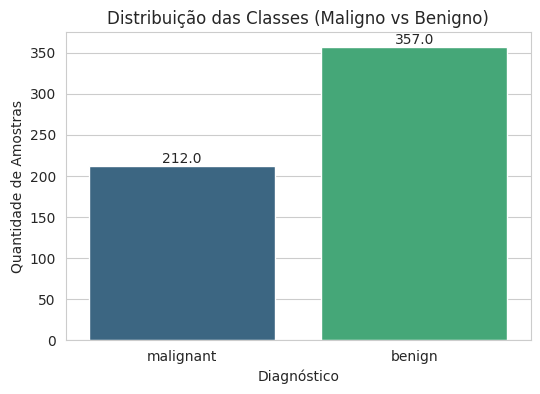

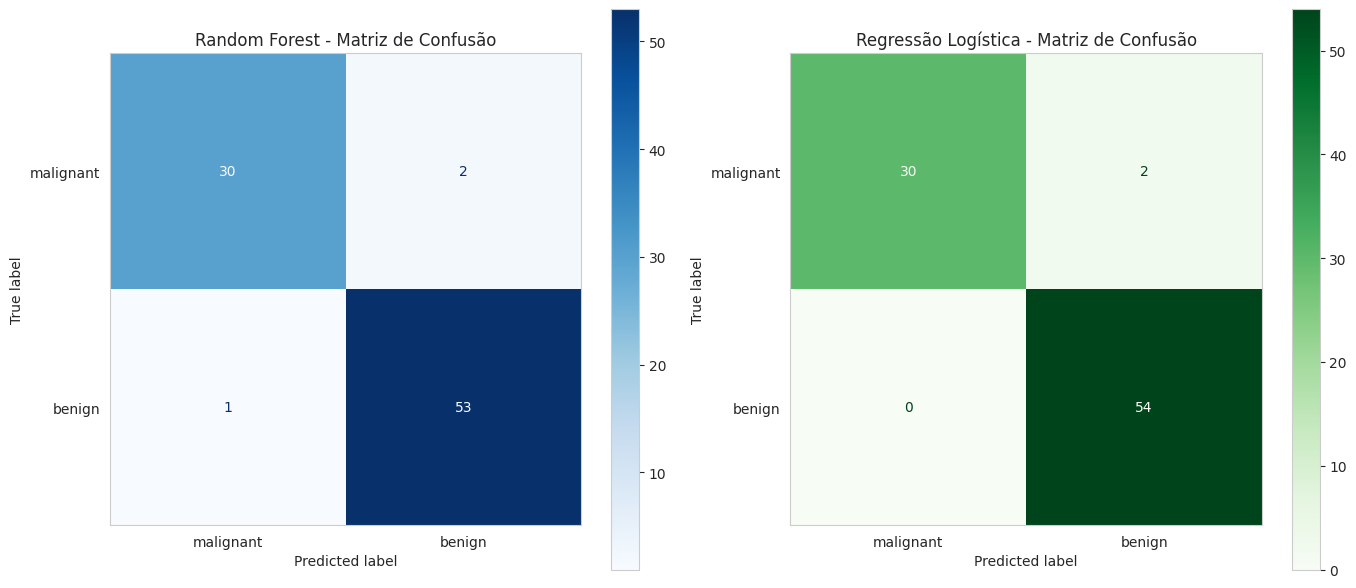

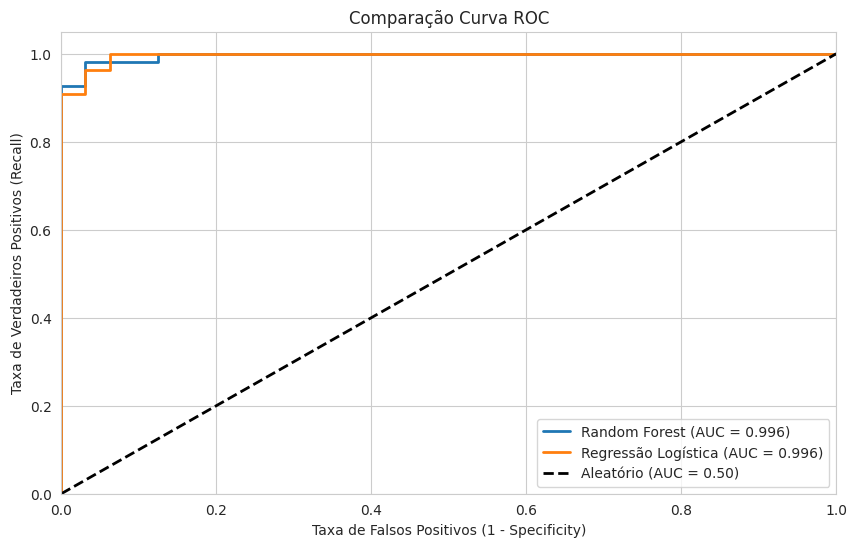

In [ ]:
# Configuração de estilo
sns.set_style("whitegrid")

# --- VISUALIZAÇÃO 1: Distribuição das Classes (Target) ---
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df_clean['target'], palette="viridis")
plt.xticks([0, 1], dataset.target_names) # Substitui 0/1 pelos nomes reais
plt.title('Distribuição das Classes (Maligno vs Benigno)')
plt.ylabel('Quantidade de Amostras')
plt.xlabel('Diagnóstico')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# --- VISUALIZAÇÃO 2: Matrizes de Confusão Comparativas ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matriz 1: Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=dataset.target_names)
disp_rf.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Random Forest - Matriz de Confusão')
axes[0].grid(False) # Remove gridlines de dentro da matriz para limpeza

# Matriz 2: Regressão Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=dataset.target_names)
disp_lr.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('Regressão Logística - Matriz de Confusão')
axes[1].grid(False)

plt.tight_layout()
plt.show()

# --- VISUALIZAÇÃO 3: Curva ROC (Receiver Operating Characteristic) ---
plt.figure(figsize=(10, 6))

# Cálculo da curva Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)

# Cálculo da curva Regressão Logística
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.3f})', linewidth=2)

# Linha base
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatório (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Specificity)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Comparação Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:

# Metrics for Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Random Forest Metrics:\nAccuracy: {accuracy_rf:.4f}\nPrecision: {precision_rf:.4f}\nF1-Score: {f1_rf:.4f}\n")
print(f"Logistic Regression Metrics:\nAccuracy: {accuracy_lr:.4f}\nPrecision: {precision_lr:.4f}\nF1-Score: {f1_lr:.4f}")

Random Forest Metrics:
Accuracy: 0.9651
Precision: 0.9636
F1-Score: 0.9725

Logistic Regression Metrics:
Accuracy: 0.9767
Precision: 0.9643
F1-Score: 0.9818


In [ ]:

metrics_data = {
    'Model': ['Random Forest', 'Random Forest', 'Random Forest',
              'Logistic Regression', 'Logistic Regression', 'Logistic Regression'],
    'Metric': ['Accuracy', 'Precision', 'F1-Score',
               'Accuracy', 'Precision', 'F1-Score'],
    'Value': [accuracy_rf, precision_rf, f1_rf,
              accuracy_lr, precision_lr, f1_lr]
}
df_metrics = pd.DataFrame(metrics_data)

print(df_metrics)

                 Model     Metric     Value
0        Random Forest   Accuracy  0.965116
1        Random Forest  Precision  0.963636
2        Random Forest   F1-Score  0.972477
3  Logistic Regression   Accuracy  0.976744
4  Logistic Regression  Precision  0.964286
5  Logistic Regression   F1-Score  0.981818


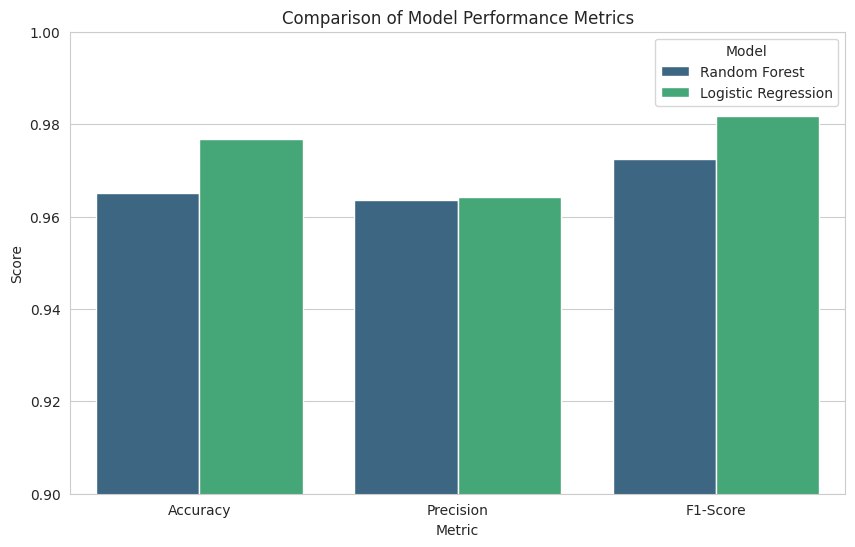

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_metrics, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0.9, 1.0) # Focus on the relevant range for better comparison
plt.legend(title='Model')
plt.show()